# Recurrent Neural Network
### Ashutosh Raichurkar

## What is RNN?
Recurrent Neural Network is a generalization of feedforward neural network that has an internal memory. RNN is recurrent in nature as it performs the same function for every input of data while the output of the current input depends on the past one computation. After producing the output, it is copied and sent back into the recurrent network. For making a decision, it considers the current input and the output that it has learned from the previous input.
Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition. In other neural networks, all the inputs are independent of each other. But in RNN, all the inputs are related to each other.

**Abstract:** In this notebook I have attempted to predict the stock prices of Tesla using RNN. Here I tried using LSTM and GRU architecture. The dataset contains the columns like High, Low, Open, Close and AdjClose, that capture various aspect of Tesla Shares from 16th April 2015 to 13th April 2020

### The LSTM (Long Short-Term Memory ) Architecture

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png")

### The GRU(Gated recurrent units) Architecture

In [4]:
Image(url= "https://miro.medium.com/max/1724/1*GSZ0ZQZPvcWmTVatAeOiIw.png")

In [6]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [8]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Tesla Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Tesla Stock Price')
    plt.title('Tesla Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Tesla Stock Price')
    plt.legend()
    plt.show()

In [9]:
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))


In [13]:
dataset = web.DataReader('TSLA','yahoo')
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-16,209.169998,206.289993,207.699997,206.699997,1659100,206.699997
2015-04-17,206.880005,203.500000,204.990005,206.789993,2469900,206.789993
2015-04-20,207.850006,203.850006,206.779999,205.270004,2559300,205.270004
2015-04-21,210.750000,204.309998,205.800003,209.410004,3432500,209.410004
2015-04-22,221.880005,211.690002,212.500000,219.440002,7863000,219.440002


In [15]:
dataset.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [18]:
dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-06,521.000000,497.959991,511.200012,516.239990,14901800,516.239990
2020-04-07,565.000000,532.340027,545.000000,545.450012,17919800,545.450012
2020-04-08,557.210022,533.330017,554.200012,548.840027,12656000,548.840027
2020-04-09,575.179993,557.109985,562.090027,573.000000,13650000,573.000000
2020-04-13,652.000000,580.530029,590.159973,650.950012,22309500,650.950012


In [19]:
training_set = dataset[:'2019'].iloc[:,1:2].values
test_set = dataset['2020':].iloc[:,1:2].values

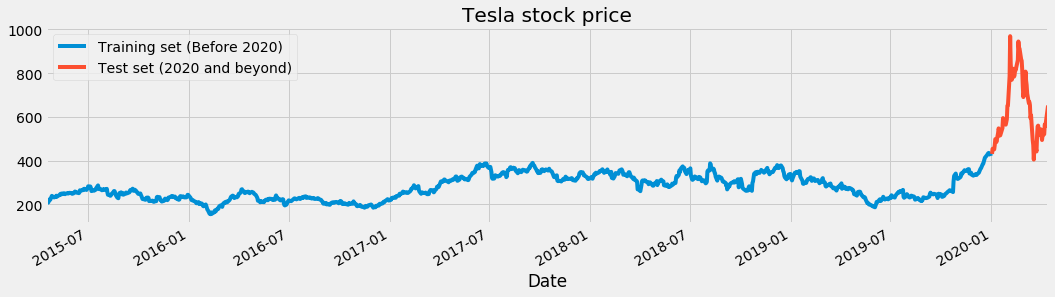

In [21]:
dataset["High"][:'2019'].plot(figsize=(16,4),legend=True)
dataset["High"]['2020':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2020)','Test set (2020 and beyond)'])
plt.title('Tesla stock price')
plt.show()

In [22]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [25]:
X_train = []
y_train = []
for i in range(60,1187):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [54]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1127/1127 [==============================] - 139s 123ms/step - loss: 0.0271
Epoch 2/50
1127/1127 [==============================] - 79s 70ms/step - loss: 0.0142
Epoch 3/50
1127/1127 [==============================] - 84s 74ms/step - loss: 0.0117
Epoch 4/50
1127/1127 [==============================] - 70s 62ms/step - loss: 0.0097
Epoch 5/50
1127/1127 [==============================] - 67s 60ms/step - loss: 0.0094
Epoch 6/50
1127/1127 [==============================] - 66s 59ms/step - loss: 0.0083
Epoch 7/50
1127/1127 [==============================] - 67s 59ms/step - loss: 0.0078
Epoch 8/50
1127/1127 [==============================] - 67s 60ms/step - loss: 0.0072
Epoch 9/50
1127/1127 [==============================] - 70s 62ms/step - loss: 0.0067
Epoch 10/50
1127/1127 [==============================] - 73s 65ms/step - loss: 0.0063
Epoch 11/50
1127/1127 [==============================] - 70s 62ms/step - loss: 0.0063
Epoch 12/50
1127/1127 [==============================] - 70s 

In [55]:
dataset_total = pd.concat((dataset["High"][:'2019'],dataset["High"]['2020':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [56]:
X_test = []
for i in range(60,130):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

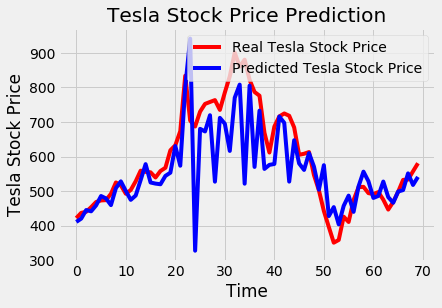

In [57]:
plot_predictions(test_set,predicted_stock_price)

In [58]:
#Evaluate the model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 96.12208509914637.


In [45]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50
1127/1127 [==============================] - 42s 37ms/step - loss: 0.1217
Epoch 2/50
1127/1127 [==============================] - 15s 14ms/step - loss: 0.0727
Epoch 3/50
1127/1127 [==============================] - 15s 14ms/step - loss: 0.0474
Epoch 4/50
1127/1127 [==============================] - 15s 14ms/step - loss: 0.0322
Epoch 5/50
1127/1127 [==============================] - 16s 14ms/step - loss: 0.0271
Epoch 6/50
1127/1127 [==============================] - 18s 16ms/step - loss: 0.0239
Epoch 7/50
1127/1127 [==============================] - 16s 14ms/step - loss: 0.0205
Epoch 8/50
1127/1127 [==============================] - 16s 14ms/step - loss: 0.0166
Epoch 9/50
1127/1127 [==============================] - 15s 14ms/step - loss: 0.0141
Epoch 10/50
1127/1127 [==============================] - 16s 14ms/step - loss: 0.0111
Epoch 11/50
1127/1127 [==============================] - 18s 16ms/step - loss: 0.0087
Epoch 12/50
1127/1127 [==============================] - 18s 16

In [46]:
X_test = []
for i in range(60,130):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

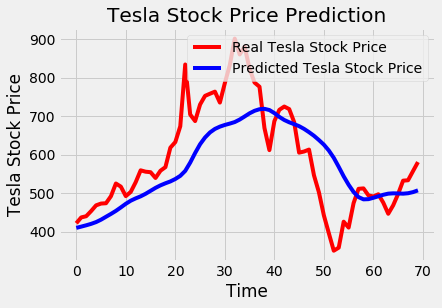

In [47]:
plot_predictions(test_set,GRU_predicted_stock_price)

In [48]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 96.94854517958792.


**Copyright 2020 Ashutosh Raichurkar**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.